In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

df = pd.read_csv('./dataset.csv')

# Make sure we loaded in the dataset.
df.head()

C:\Users\akhil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11,54,55,56,57,58,59,60,61,62,63,64,67,69,73,75,76,77,78,79,80,81,83,84,86,87,88,89,91,92,93,94,95,96,101,111,113,114,115,116,117,120,121,122,123,124,125,126,135,140,141,142,143,148,149,150,151,152,153,154,157,158,160,163,170,171,172,173,175,176,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,237,238,255,257,258,259,272,273,283,308) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,_bkt,_cd,_eventtype_color,_indextime,_raw,_sourcetype,_time,action,additionalEventData.LoginTo,additionalEventData.MFAUsed,...,user_agent,user_arn,user_group_id,user_id,user_role,user_type,vendor,vendor_account,vendor_region,vpcEndpointId
0,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010563,NaN,1534777232,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,1534776810,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
1,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010534,NaN,1534777232,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,1534776809,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
2,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010505,NaN,1534777232,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,1534776809,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
3,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010476,NaN,1534777232,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,1534776809,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
4,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010450,NaN,1534777232,"{""requestParameters"": {""securityGroupIdSet"": {...",aws:cloudtrail,1534776809,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN


In [2]:

# Timestamp data is displayed in epoch rather than a human readable time format.
# Let's convert it:

df['_time'] = pd.to_datetime(df['_time'], unit='s')
df['_indextime'] = pd.to_datetime(df['_indextime'], unit='s')
df = df.sort_values('_time')

# And check our conversion worked:
df.head()

,_bkt,_cd,_eventtype_color,_indextime,_raw,_sourcetype,_time,action,additionalEventData.LoginTo,additionalEventData.MFAUsed,...,user_agent,user_arn,user_group_id,user_id,user_role,user_type,vendor,vendor_account,vendor_region,vpcEndpointId
4577,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171332,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:01:54,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN
4575,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171388,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:01:54,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN
4576,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171360,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:01:54,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN
4578,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171304,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:01:56,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN
4574,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171416,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:02:00,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN


In [3]:
df_prime = df[['_time', 'sourceIPAddress', 'errorCode']]

df_prime.set_index('_time', inplace=True, drop=True)

df_prime.head()

,sourceIPAddress,errorCode
_time,,
2018-08-20 09:01:54,34.215.24.225,success
2018-08-20 09:01:54,34.215.24.225,success
2018-08-20 09:01:54,34.215.24.225,success
2018-08-20 09:01:56,34.215.24.225,success
2018-08-20 09:02:00,34.215.24.225,success


In [4]:
# Create a list of error codes
error_codes = df_prime['errorCode'].unique().tolist()

# Let's see what they are
pprint(error_codes)

['success',
 'NoSuchEntityException',
 'NoSuchCORSConfiguration',
 'NoSuchLifecycleConfiguration',
 'NoSuchTagSet',
 'AccessDenied',
 'Client.UnauthorizedOperation',
 'Client.InstanceLimitExceeded',
 'Client.Unsupported',
 'Server.InsufficientInstanceCapacity',
 'NoSuchBucketPolicy',
 'ReplicationConfigurationNotFoundError',
 'NoSuchWebsiteConfiguration']


In [5]:
# Initialize empty dictionary
error_codes_dfs = {}

# Create a dataframe for each unique errorCode and store it in
# our empty error_codes_dfs so we can call the unique df by the errorCode name
for code in error_codes:
    error_codes_dfs[code] = df_prime[df_prime['errorCode'] == code]

# To validate, let's get the shape of each df and
# see if the sum is the same as our original df
total_rows = 0
for code in error_codes_dfs:
    total_rows += error_codes_dfs[code].shape[0]

print(f"Number of DFs: {len(error_codes_dfs)}")
print(f"Total Rows: {total_rows}")

Number of DFs: 13
Total Rows: 5450


In [6]:
# Great, that worked!

# Let's now use the pipeline from the last analysis to put 
# each dataframe through a small pipeline
# Pipeline: Pivot (agg by size) -> Resample for 10m interval
# First create copy of the error_codes_dfs
ec_pivt_dfs = error_codes_dfs

for code in ec_pivt_dfs:
    ec_pivt_dfs[code] = ec_pivt_dfs[code].pivot_table(index='_time', columns='sourceIPAddress', aggfunc='size', fill_value=0)
    ec_pivt_dfs[code] = ec_pivt_dfs[code].resample("10T").sum()

In [7]:
# For validation sake, lets see what a few of the dataframes look like:

ec_pivt_dfs['success'].head()

sourceIPAddress,107.77.212.175,139.198.18.205,157.97.121.132,34.215.24.225,35.153.154.221,54.240.198.66,54.240.198.68,54.240.198.98,68.133.81.54,68.133.85.134,68.133.85.173,68.133.86.151,68.133.86.157,68.133.89.107,68.133.89.13,68.133.89.65,68.133.89.7,AWS Internal,lambda.amazonaws.com
_time,,,,,,,,,,,,,,,,,,,
2018-08-20 09:00:00,0,0,0,211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2018-08-20 09:10:00,0,10,0,82,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-08-20 09:20:00,0,5,0,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-08-20 09:30:00,0,0,17,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-08-20 09:40:00,0,0,0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
ec_pivt_dfs['Client.InstanceLimitExceeded'].head()

sourceIPAddress,139.198.18.205
_time,
2018-08-20 09:10:00,171
2018-08-20 09:20:00,109


In [9]:
ec_pivt_dfs['Client.UnauthorizedOperation'].head()

sourceIPAddress,139.198.18.205,82.102.18.111
_time,,
2018-08-20 09:10:00,129,0
2018-08-20 09:20:00,101,1


In [10]:
# # Cool! So it looks like everything is working. Lets see if we can now plot all of the data

# for code in ec_pivt_dfs:
#     plt.figure(figsize=(8,4))
#     ip_plot = sns.lineplot(data=ec_pivt_dfs[code])
#     plt.xticks(rotation=15)
#     plt.title(f'Events by sourceIPAddress over Time - {code}')
#     plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0)

#     plt.show()

Let's take a look at how the error codes are mapped to the IP's.
Trying to identify a threat IP by the proportion of error codes generated for the IP as compared to successful connections

In [11]:
# Pivot table with IP as index and the error code as columns
ip_ecode_df=df_prime.pivot_table(index='sourceIPAddress', columns='errorCode', aggfunc='size', fill_value=0)

# Total nnumber of requests made by IP
ip_ecode_df['TotalRequests']=ip_ecode_df.sum(axis=1)

# Total number of unsuccessful attempts made
ip_ecode_df['Unsuccessful']=ip_ecode_df.iloc[:,:-2].sum(axis=1)

# Ratio of unsuccessful attempts to total requests
ip_ecode_df['Ratio']=ip_ecode_df['Unsuccessful']/ip_ecode_df['TotalRequests']

ip_ecode_df

errorCode,AccessDenied,Client.InstanceLimitExceeded,Client.UnauthorizedOperation,Client.Unsupported,NoSuchBucketPolicy,NoSuchCORSConfiguration,NoSuchEntityException,NoSuchLifecycleConfiguration,NoSuchTagSet,NoSuchWebsiteConfiguration,ReplicationConfigurationNotFoundError,Server.InsufficientInstanceCapacity,success,TotalRequests,Unsuccessful,Ratio
sourceIPAddress,,,,,,,,,,,,,,,,
107.77.212.175,0,0,0,0,49,5,0,1,1,1,1,0,494,552,58,0.105072
139.198.18.205,1,280,230,104,0,0,0,0,0,0,0,7,15,637,622,0.976452
157.97.121.132,0,0,0,0,0,0,2,0,0,0,0,0,17,19,2,0.105263
209.107.196.112,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.000000
34.215.24.225,0,0,0,0,0,144,9,144,54,0,0,0,3720,4071,351,0.086220
35.153.154.221,4,0,0,0,0,0,0,0,0,0,0,0,2,6,4,0.666667
54.240.198.66,0,0,0,0,0,0,0,0,0,0,0,0,11,11,0,0.000000
54.240.198.68,0,0,0,0,0,0,0,0,0,0,0,0,22,22,0,0.000000
54.240.198.98,0,0,0,0,0,0,0,0,0,0,0,0,11,11,0,0.000000


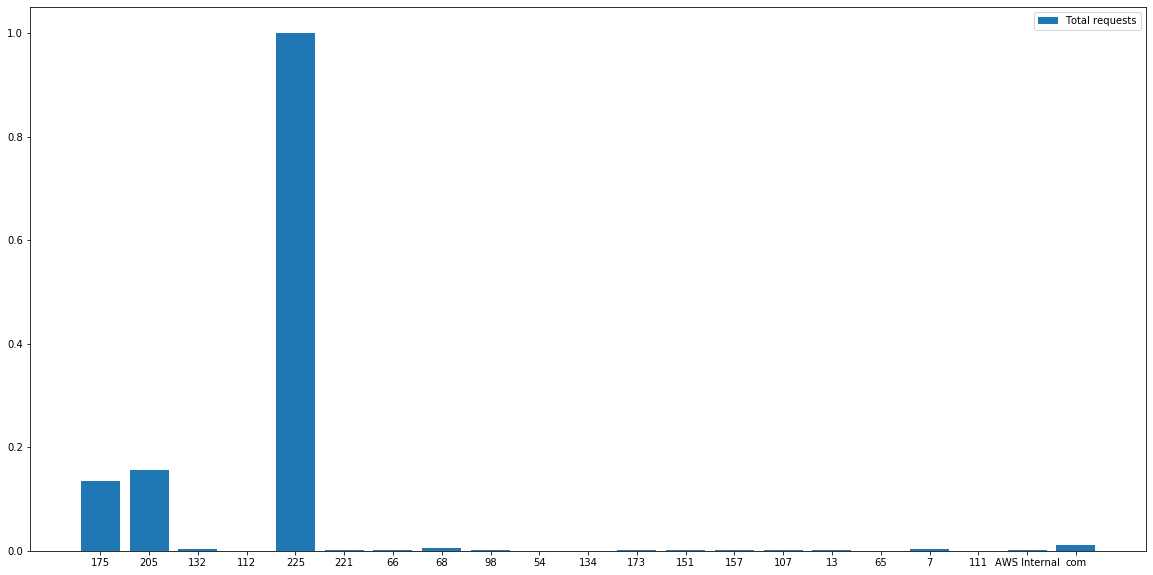

In [12]:
# #plt.scatter(ip_ecode_df.TotalRequests, ip_ecode_df.Ratio)
# iterting through list to check for string data types
#b=list(map(lambda x:isinstance(x, str),a))

#list of IPs
a=list(ip_ecode_df.index)

# Extracting last element of CIDR block
b=list(map(lambda x:x.split('.')[-1],a))

tr=ip_ecode_df.TotalRequests

#scaling vales between 0-1
normalized_tr = (tr-min(tr))/(max(tr)-min(tr))

plt.figure(figsize=(20,10))

tot_requests_plot=plt.bar(b,normalized_tr,label='Total requests')

plt.legend()


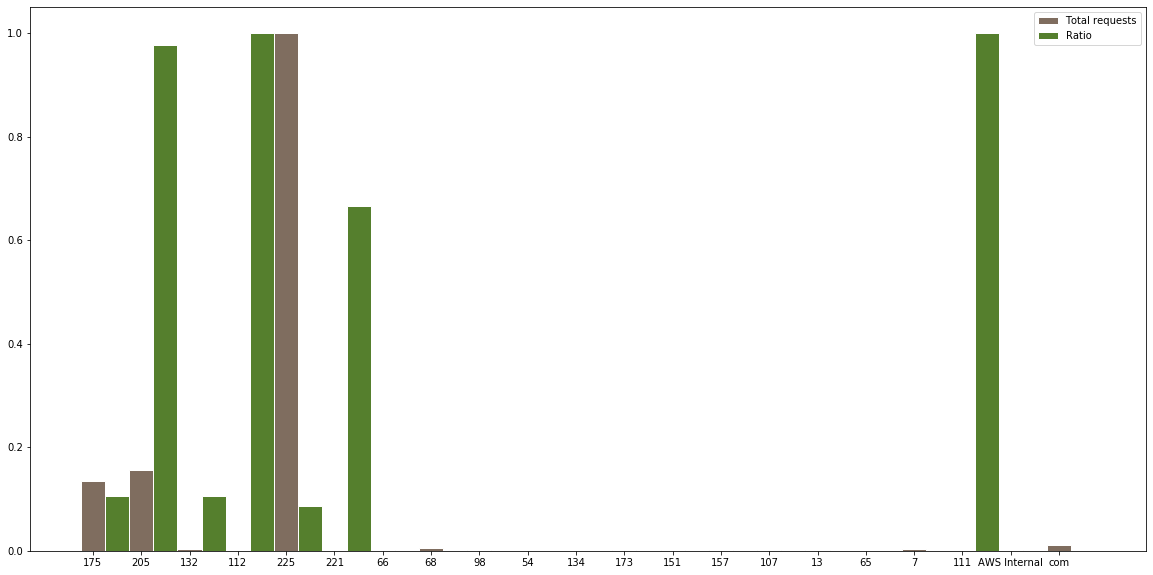

In [13]:

fig, ax = plt.subplots(figsize=(20, 10))
r1 = np.arange(len(b))
r2 = [x + 0.5 for x in r1]

 
# Make the plot
ax.bar(r1, normalized_tr, color='#7f6d5f', width=0.5, edgecolor='white', label='Total requests')
ax.bar(r2, ip_ecode_df.Ratio, color='#557f2d', width=0.5, edgecolor='white', label='Ratio')

ax.set_xticks(r1)
ax.set_xticklabels(b)

ax.legend()


Generally those IPs with higer ratios are the ones that require attention and may be potential attacker, having the normalized toatal request next to them gives an idea of whether there was a brute force attack or not.

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(ip_ecode_df)
y_means = kmeans.predict(ip_ecode_df)
y_means

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0, 0.5, 'TotalRequests')

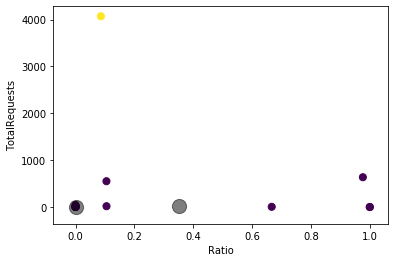

In [15]:
plt.scatter(ip_ecode_df.Ratio, ip_ecode_df.TotalRequests, c=y_means, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Ratio')
plt.ylabel('TotalRequests')

From the simple clustering we see that there are some IPs with a large number of requests but a small ration of unsccessful to successful. TOward the right side we see two clsuters which have a comparatively low number of requests but higher number of unsuccessful attempts,